<a href="https://colab.research.google.com/github/riskakurniaa/Machine-Learning/blob/Jobsheet7/Tugas_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama  : **Riska Kurnia Triwulandari**  
Kelas : **3A**  
NIM   : **2241720039**

#Tugas Praktikum
Download dataset Mall_Customers


Buatlah sebuah model K-Means dengan ketentuan,

1. Gunakan data 'Mall_Customers.csv'

2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.

4. Buatlah  implementasi model SOM untuk segmentasi citra lain

###1. Gunakan data 'Mall_Customers.csv'

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# Load Data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning/Mall_Customers.csv')

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# cek data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# cek data
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [6]:
data.shape

(200, 5)

###2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

Melihat fitur yang memungkinkan dengan visualisasi


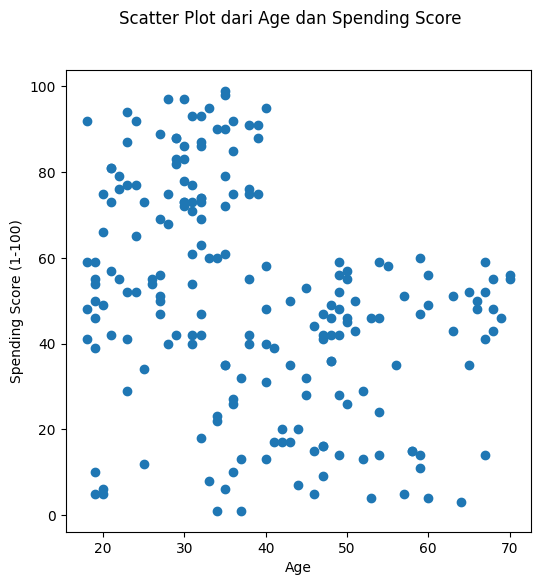

In [7]:
# Distribusi Age dan Spending-Score
age = data['Age'].tolist()  # mengubah kolom 'Age' menjadi list
spending_score = data['Spending Score (1-100)'].tolist()  # mengubah kolom 'Spending Score (1-100)' menjadi list
fig = plt.figure(figsize=(6,6))
plt.scatter(age, spending_score)
plt.suptitle("Scatter Plot dari Age dan Spending Score")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

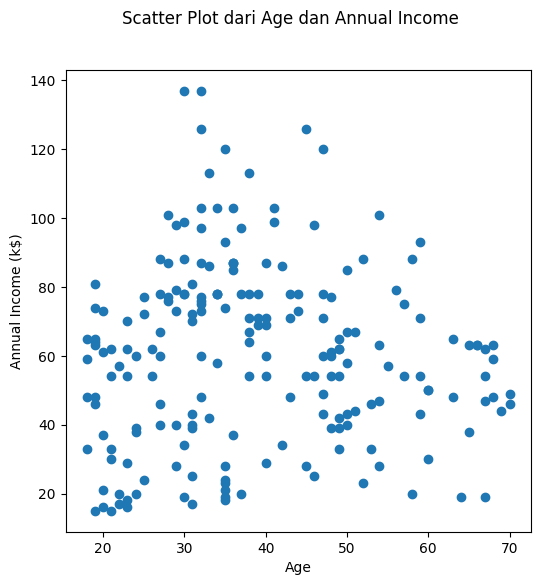

In [8]:
# Distribusi Age dan Annual Income
age = data['Age'].tolist()  # mengubah kolom 'Age' menjadi list
annual_income = data['Annual Income (k$)'].tolist()  # mengubah kolom 'Annual Income (k$)' menjadi list
fig = plt.figure(figsize=(6,6))
plt.scatter(age, annual_income)
plt.suptitle("Scatter Plot dari Age dan Annual Income")
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.show()

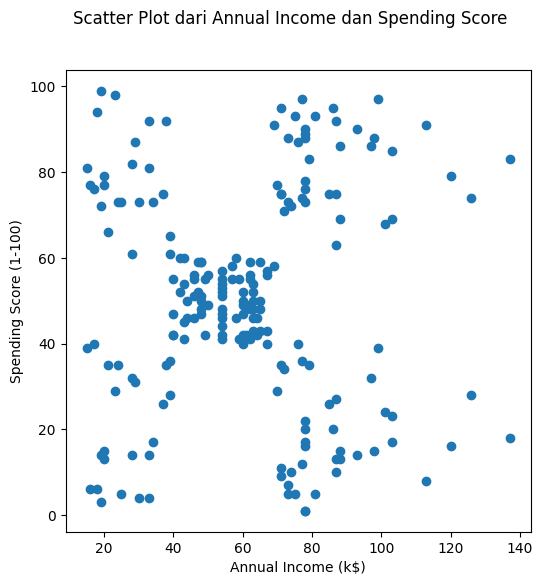

In [9]:
# Distribusi Annual Income dan Spending Score
annual_income = data['Annual Income (k$)'].tolist()  # mengubah kolom 'Annual Income (k$)' menjadi list
spending_score = data['Spending Score (1-100)'].tolist()  # mengubah kolom 'Spending Score (1-100)' menjadi list
fig = plt.figure(figsize=(6,6))
plt.scatter(annual_income, spending_score)
plt.suptitle("Scatter Plot dari Annual Income dan Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

**Seleksi Fitur dengan Metode PCA**

Principal Component Analysis (PCA) adalah metode yang digunakan untuk mengurangi dimensi data dengan mengubah data asli menjadi kombinasi linear dari fitur asli. PCA mencari arah di mana data memiliki variansi terbesar dan mengubah data ke dalam ruang dimensi yang lebih rendah. PCA dapat digunakan untuk memilih subset fitur yang paling signifikan dalam data.

In [10]:
# Fitur berjumlah 3
# Metode PCA
from sklearn.decomposition import PCA

# mendefinisikan fitur dan target
feature = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
target = ['CustomerID']

# split fitur dan target
X = data[feature]
y = data[target]

print(X.head(), '\n')
print(y.head())

   Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40 

   CustomerID
0           1
1           2
2           3
3           4
4           5


In [11]:
# menjalankan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# rasio variansi
print('Rasio Variansi:', pca.explained_variance_ratio_)

Rasio Variansi: [0.45125272 0.44098465]



**pca.explained_variance_ratio_** adalah kode yang digunakan untuk mencetak rasio variansi yang dijelaskan oleh setiap komponen utama dalam data. Rasio variansi ini menunjukkan seberapa banyak informasi yang dijelaskan oleh setiap komponen utama dalam data. Semakin tinggi rasio variansi, semakin banyak informasi yang dijelaskan oleh komponen utama tersebut. Dalam seleksi fitur, rasio variansi dapat digunakan untuk menentukan jumlah komponen utama yang akan digunakan dalam clustering. Jumlah komponen utama yang dipilih harus cukup untuk menjelaskan sebagian besar variansi dalam data, tetapi tidak terlalu banyak sehingga dapat mengurangi kinerja clustering.

In [12]:
# menjalankan K-Means clustering pada reduced data
kmeans = KMeans(n_clusters=5, n_init=8, random_state=0).fit(X_pca)

# Print cluster centers
print('Cluster centers:', kmeans.cluster_centers_)

Cluster centers: [[ -4.41034605  -3.10054946]
 [ 41.55109062   1.86988377]
 [  4.98429835 -46.67348852]
 [-44.38700009 -10.04934895]
 [-10.22346234  42.33151065]]


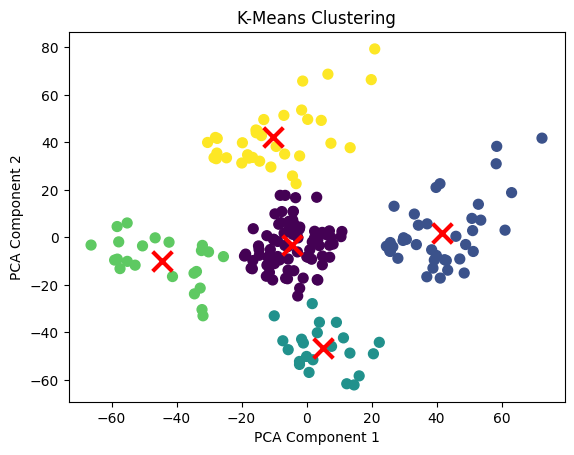

In [13]:
y_kmeans = kmeans.predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=200, linewidths=3, color='r')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering')
plt.show()

###3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.

**Metode Elbow**

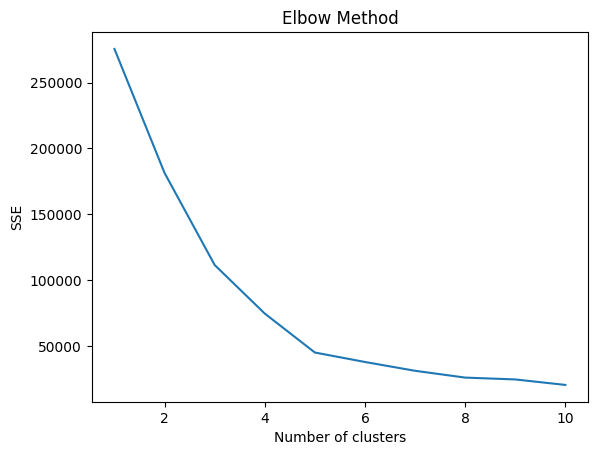

k=1; SSE=275534.30374608724
k=2; SSE=181408.6734935677
k=3; SSE=111540.6734591188
k=4; SSE=74664.88785512332
k=5; SSE=45092.072284924754
k=6; SSE=37908.6260312493
k=7; SSE=31220.9043123207
k=8; SSE=26054.80022191091
k=9; SSE=24650.527469381042
k=10; SSE=20493.39339314305


In [14]:
# menghitung K-Means clustering untuk setiap nilai k yang berbeda

# list nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,11)   # (1,11) karena 11 akan dikurangi 1

for k in K:
    kmeans = KMeans(n_clusters=k, n_init=8, random_state=0).fit(X_pca)
    sse.append(kmeans.inertia_)

# Plot SSE vs. k
plt.plot(K, sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

Tambahan

**Menggunakan library YellowBrick**

Metode Elbow

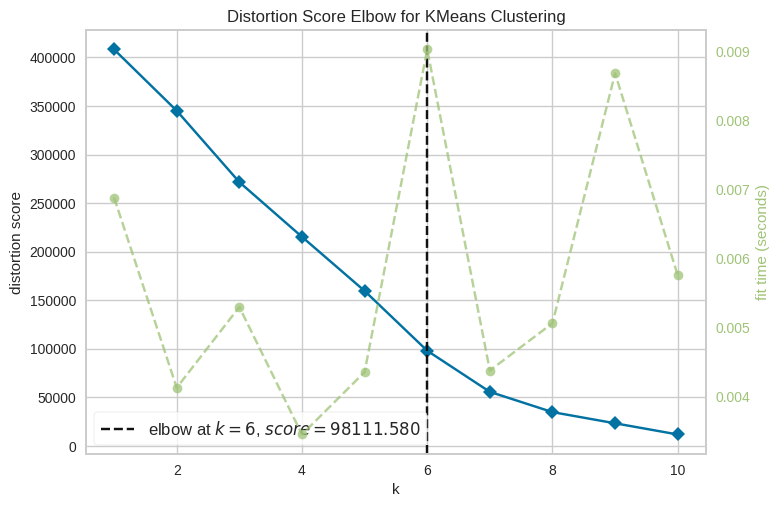

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 10 random clusters
X_pca, y = make_blobs(n_samples=1000, n_features=12, centers=10, random_state=42)  # make_blobs tidak bisa ditambahkan n_init

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))

visualizer.fit(X_pca)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Metode Silhouette

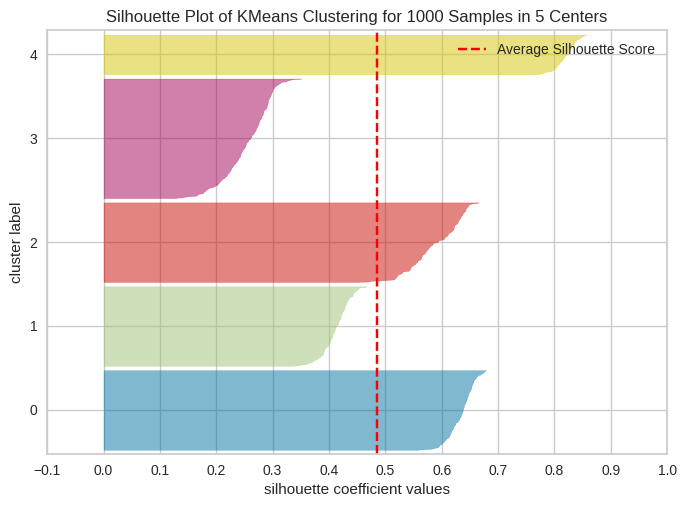

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1000 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [16]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(5, random_state=42, n_init=8)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

# fit data
visualizer.fit(X_pca)

# Finalize and render the figure
visualizer.show()

###4. Buatlah  implementasi model SOM untuk segmentasi citra lain

In [17]:
# Instalasi SOM
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=6de7166b0e086c2f46f1781788ea8ab2edf1732019ca4aeb02d85b0823544396
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


In [18]:
# Import Library
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [19]:
# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

In [20]:
# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

In [21]:
# Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

In [22]:
# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

In [23]:
# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

In [24]:
# Load citra Lenna (Anda bisa mengganti ini dengan citra lain jika diperlukan)
cute_path = '/content/drive/MyDrive/Machine Learning/cute.jpg'
cute = io.imread(cute_path) / 255.0  # Normalisasi intensitas piksel menjadi rentang [0, 1]

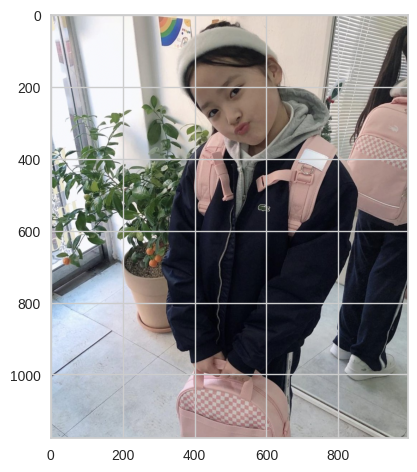

In [25]:
plt.imshow(cute)

In [26]:
# Latih SOM
num_epochs = 100
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(cute, num_epochs, initial_learning_rate, initial_neighborhood_radius)

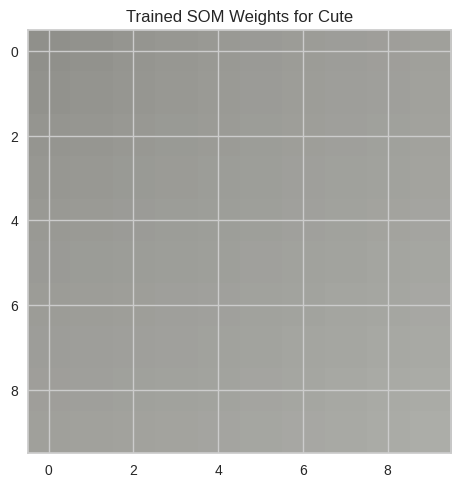

In [31]:
# Visualisasi bobot SOM
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Cute')
plt.show()